##Lesson 06 Demo

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf


In [6]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

#Checks for Linear Regression. It works best when: 
1. The data is normally distributed (but doesn’t have to be)

2. X’s are independent of each other (low multicollinearity)

3. X’s significantly explain y (have low p-values)





## Check 1. Distribution

#### Last time we plotted our data like this

NameError: name 'data' is not defined

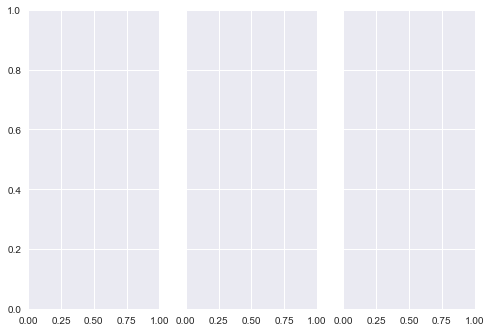

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Seaborn plotting library 
https://stanford.edu/~mwaskom/software/seaborn/index.html

Today we use lmplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html


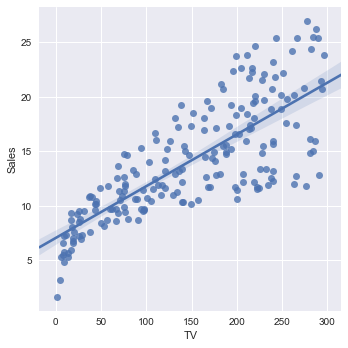

In [4]:
sns.lmplot('TV', 'Sales', data)


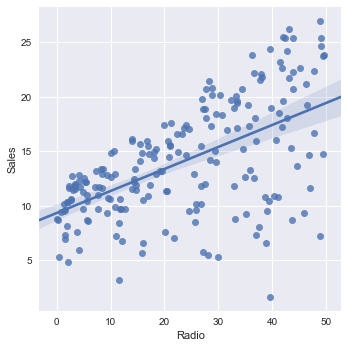

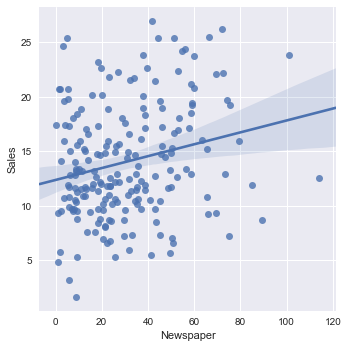

In [5]:
sns.lmplot('Radio', 'Sales', data)
sns.lmplot('Newspaper', 'Sales', data)

## Check 2. Low Multicollinearity

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000
Axes(0.125,0.125;0.62x0.775)


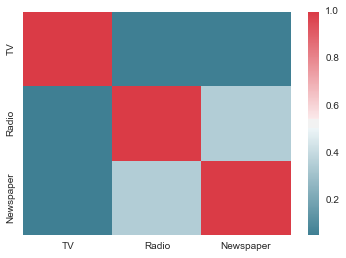

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data[['TV', 'Radio', 'Newspaper']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### Student question: 
1. Do these variables have colinearity? 

Answer: Radio and newspapers do show some signts of potential collinearity in their relationship with TV.  As such we should be careful in interpreting our results.

## Check 3: X’s significantly explain y (have low p-values)

#### Let's take a look again the the crude model

In [11]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 08 May 2016   Prob (F-statistic):           1.47e-42
Time:                        12:09:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Student Model
#### Now do a full model with TV, Radio and Newspaper
syntax can be found here: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [7]:
#fit model
lm2 = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = data)
res = lm2.fit()

#print summary

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           1.58e-96
Time:                        21:42:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

#### 1. Which of the media buys were significantly associated with the sales? 

Answer: The most strongly and positively correlated with sales were Radio sales, followed by tv. There was weakly inverse proportional relationship with newspapers.

#### 2. Controlling for all the other media buys, which media type had the largest association with sales?

Answer: Radio sales, as mentioned in question 1.

###3. Given that one of the variables above was not significant do we drop it from our model? Why or why not? 

Answer: Regression coefficients are conditional on all variables in the model.  By removing nonsignficant predictors we may make the model fit the dataset better but we run the risk of overfitting in that case.  We would be better to investigate further whether the variable is important for other reasons.  The possible collinearity between TV, Radio and Newspaper suggests evidenced in the heatmap suggests that one should proceed carefully before removing a variable out of hand.

In [1]:
y = data[['Sales']]
x = data[['TV', 'Radio']]

#fit model

model2 = sm.OLS(y,x)
ml=smf.ols(formula='y-x', data=data).fit()

results2 = model2.fit()

NameError: name 'data' is not defined